# MODELO EPIDEMICO SIR

# Introduccion:

   Una descripción matemática simple de la propagación de una enfermedad en una población es el llamado modelo SIR, que divide la población (fija) de N individuos en tres "compartimentos" que pueden variar en función del tiempo, t:

 * S(t):
   Son aquellos susceptibles pero aún no infectados con la enfermedad.
 
 * I(t):
   Es el numero de individuos infectados.
   
 * R(t):
   Son aquellos individuos que se han recuperado de la enfermedad y ahora  son inmunes a ella.
   
  
El modelo SIR describe el cambio en la población de cada uno de estos compartimentos en términos de dos parámetros, β
  y γ.
  
* β
  describe la tasa de contacto efectiva de la enfermedad:
  Un individuo infectado entra en contacto con βN
  otros individuos por unidad de tiempo (de los cuales la fracción que es susceptible a contraer la enfermedad es S / N
* γ
  es la tasa de recuperación media: es decir, 1 / γ
  es el período de tiempo promedio durante el cual un individuo infectado puede transmitirlo.


In [3]:
#CODIGO EN CONSTRUCCION
import numpy as np
import math
import pandas as pd
import pythran


In [2]:
pip install pythran


     |████████████████████████████████| 3.6MB 1.1MB/s eta 0:00:01
  Stored in directory: /Users/familiavs/Library/Caches/pip/wheels/b5/4c/4f/3e8c360280dd141601ddc0cd9f243216f1ef90447faee31764
  Stored in directory: /Users/familiavs/Library/Caches/pip/wheels/4f/08/d2/498000f2d09d268e2f04bae9792e640f989f1ac046e6fab1b8
Successfully built pythran beniget
ERROR: tensorflow 2.1.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2
Note: you may need to restart the kernel to use updated packages.


In [4]:
%%writefile .pythranrc
[compiler]
include_dirs=/usr/include/openblas


Writing .pythranrc


In [5]:
%load_ext pythran.magic


In [6]:
np.random.seed(123)


In [7]:
def sir(u,parms,t):
    bet,gamm,iota,N,dt=parms
    S,I,R,Y=u
    lambd = bet*(I+iota)/N
    ifrac = 1.0 - math.exp(-lambd*dt)
    rfrac = 1.0 - math.exp(-gamm*dt)
    infection = np.random.binomial(S,ifrac)
    recovery = np.random.binomial(I,rfrac)
    return [S-infection,I+infection-recovery,R+recovery,Y+infection]

def simulate():
    parms = [0.1, 0.05, 0.01, 1000.0, 0.1]
    tf = 200
    tl = 2001
    t = np.linspace(0,tf,tl)
    S = np.zeros(tl)
    I = np.zeros(tl)
    R = np.zeros(tl)
    Y = np.zeros(tl)
    u = [999,1,0,0]
    S[0],I[0],R[0],Y[0] = u
    for j in range(1,tl):
        u = sir(u,parms,t[j])
        S[j],I[j],R[j],Y[j] = u
    return {'t':t,'S':S,'I':I,'R':R,'Y':Y}


In [8]:
%timeit simulate()


9.46 ms ± 652 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [9]:
sir_out = pd.DataFrame(simulate())


In [10]:
sir_out


,t,S,I,R,Y
0,0.0,999.0,1.0,0.0,0.0
1,0.1,999.0,1.0,0.0,0.0
2,0.2,999.0,1.0,0.0,0.0
3,0.3,999.0,1.0,0.0,0.0
4,0.4,999.0,1.0,0.0,0.0
5,0.5,999.0,1.0,0.0,0.0
6,0.6,999.0,1.0,0.0,0.0
7,0.7,999.0,1.0,0.0,0.0
8,0.8,999.0,1.0,0.0,0.0
9,0.9,999.0,1.0,0.0,0.0


In [11]:
%%pythran -DUSE_XSIMD -march=native -O3

import numpy as np
import math

#pythran export sirp(float64 list, float64 list, float64)
def sirp(u,parms,t):
    bet,gamm,iota,N,dt=parms
    S,I,R,Y=u
    lambd = bet*(I+iota)/N
    ifrac = 1.0 - math.exp(-lambd*dt)
    rfrac = 1.0 - math.exp(-gamm*dt)
    infection = np.random.binomial(S,ifrac)
    recovery = np.random.binomial(I,rfrac)
    return [S-infection,I+infection-recovery,R+recovery,Y+infection]

#pythran export simulatep()
def simulatep():
    parms = [0.1, 0.05, 0.01, 1000.0, 0.1]
    tf = 200
    tl = 2001
    t = np.linspace(0,tf,tl)
    S = np.zeros(tl)
    I = np.zeros(tl)
    R = np.zeros(tl)
    Y = np.zeros(tl)
    u = [999,1,0,0]
    S[0],I[0],R[0],Y[0] = u
    for j in range(1,tl):
        u = sirp(u,parms,t[j])
        S[j],I[j],R[j],Y[j] = u
    return {'t':t,'S':S,'I':I,'R':R,'Y':Y}


In [12]:
%timeit simulatep()


828 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [13]:
sir_outp = pd.DataFrame(simulatep())


In [14]:
import matplotlib.pyplot as plt


In [15]:
plt.style.use("ggplot")


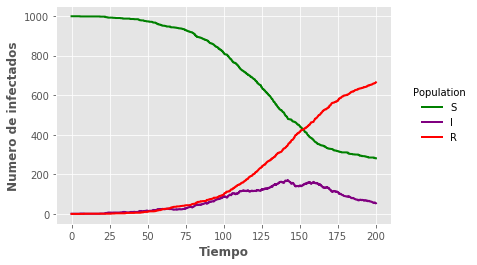

In [21]:
sline = plt.plot("t","S","",data=sir_out,color="green",linewidth=2)
iline = plt.plot("t","I","",data=sir_out,color="purple",linewidth=2)
rline = plt.plot("t","R","",data=sir_out,color="red",linewidth=2)
plt.xlabel("Tiempo",fontweight="bold")
plt.ylabel("Numero de infectados",fontweight="bold")
legend = plt.legend(title="Population",loc=5,bbox_to_anchor=(1.25,0.5))
frame = legend.get_frame()
frame.set_facecolor("white")
frame.set_linewidth(0)
